## Luglio 2017
### Esercizio 0
#### 1
Completare la tabella dei percentili: 
- 15 -> decimo percentile
- 55 -> 30esimo percentile
- 200 -> 50esimo percentile
- x -> 70esimo percentile
- y -> 90esimo percentile

x = 200 + (200-55) = 345
y = 200 + (200-15) = 385

### 2
Grafico

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Esercizio 1

In [2]:
#ESERCIZIO 1.1: Importare i dati (tenendo presente che il separatore di decimali per i numeri è la virgola 
#e i valori sono separati dal carattere ";") e dire quanti casi sono presenti nel dataset.
dati = pd.read_csv("BibliotecheQuartiere.csv",sep=";",decimal=",")
dati.columns
dati.count()
len(dati)

402

In [3]:
#ESERCIZIO 1.2: Da quale anno a quale anno sono stati raccolti i dati?
dati['Anno'].unique()
print("dal 1996 al 2010")

dal 1996 al 2010


In [4]:
#ESERCIZIO 1.3: Quante sono le biblioteche rionali presenti nel dataset? 
#Elencarne i nomi.
print(len(dati['Biblioteca'].unique()))
dt = dati['Biblioteca'].drop_duplicates().sort_values()
dt[:10]

73


0         Accursio
110     Accursio *
163      Accursio*
1           Affori
244       Affori *
2           Baggio
218       Baggio *
191        Baggio*
3        Bergamini
246    Bergamini**
Name: Biblioteca, dtype: object

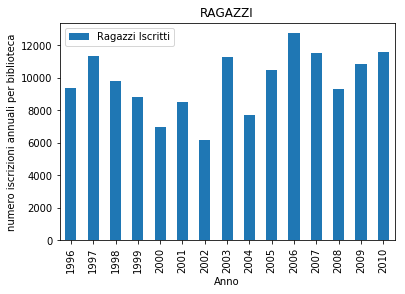

In [5]:
#ESERCIZIO 1.4.1: Tracciare il grafico che si ritiene più opportuno per descrivere il numero di ragazzi che
#si iscrivono in biblioteca all’anno. Il grafico deve avere il titolo "RAGAZZI" e sull’asse opportuno 
#(a seconda del grafico che scegliete) deve apparire l’etichetta "numero iscrizioni annuali per biblioteca".
ria = dati[['Anno','Ragazzi Iscritti']].dropna().groupby("Anno").sum()
ria.plot.bar()
plt.title("RAGAZZI")
plt.ylabel("numero iscrizioni annuali per biblioteca")
plt.show()

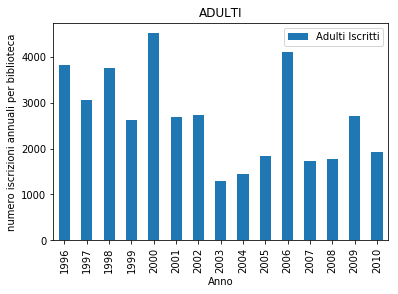

In [6]:
#ESERCIZIO 1.4.2. Tracciare un grafico analogo che descriva il numero di adulti che si iscrivono in biblioteca all’anno.
aia = dati[['Anno','Adulti Iscritti']].dropna().groupby("Anno").sum()
aia.plot.bar()
plt.title("ADULTI")
plt.ylabel("numero iscrizioni annuali per biblioteca")
plt.show()

In [7]:
#ESERCIZIO 1.5.1. Calcolare la media, la deviazione standard e il coefficiente di variazione del numero di ragazzi
#che si iscrivono in biblioteca all’anno.
print(ria.mean())
print(ria.std())
print(ria.std()/ria.mean())

Ragazzi Iscritti    9759.9224
dtype: float64
Ragazzi Iscritti    1885.754181
dtype: float64
Ragazzi Iscritti    0.193214
dtype: float64


In [8]:
#ESERCIZIO 1.5.2. Fare lo stesso per il numero di adulti.
print(aia.mean())
print(aia.std())
print(aia.std()/aia.mean())

Adulti Iscritti    2670.385333
dtype: float64
Adulti Iscritti    1017.060859
dtype: float64
Adulti Iscritti    0.380867
dtype: float64


In [9]:
#ESERCIZIO 1.5.3 Confrontare la variabilità del numero di iscrizioni di ragazzi rispetto a quella di adulti
print("Gli adulti iscritti all'anno sono più dispersi rispetto ai ragazzi iscritti")

Gli adulti iscritti all'anno sono più dispersi rispetto ai ragazzi iscritti


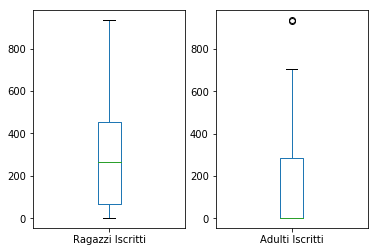

In [10]:
#ESERCIZIO 2:Concentriamoci sull’anno 2000.
#2.1. Tracciare, possibilmente nella stessa figura, il boxplot del numero di ragazzi che si sono iscritti e del numero di 
#adulti che si sono iscritti a una biblioteca rionale di Milano (nell’anno 2000).
plt.subplot(1,2,1)
dati[dati['Anno']==2000]['Ragazzi Iscritti'].plot.box()
plt.subplot(1,2,2)
dati[dati['Anno']==2000]['Adulti Iscritti'].plot.box()
plt.show()

### Esercizio 2

In [11]:
#Esercizio 2.2. Utilizzare il risultato del comando summary per rispondere alle seguenti domande: 
#2.1. nell’anno 2000 quale percentuale (circa) di biblioteche ha avuto più di 300 nuovi ragazzi iscritti? 
mask1 = dati["Anno"]==2000
mask2 = dati["Ragazzi Iscritti"]<300
len(dati[mask1 & mask2]["Biblioteca"].get_values())/len(dati["Biblioteca"].unique())

0.1917808219178082

In [12]:
#2.2. nell’anno 2000 quale percentuale (circa) di biblioteche ha avuto più di 950 nuovi iscritti?
mask1 = dati["Anno"]==2000
mask2 = dati["Ragazzi Iscritti"]>300
len(dati[mask1 & mask2]["Biblioteca"].get_values())/len(dati["Biblioteca"].unique())

0.1232876712328767

### Esercizio 3

In [13]:
#Esercizio 3.1 Concentriamoci ora sul servizio Bibliobus. 
#3.1. Creare una variabile che contiene i soli casi del dataset che si riferiscono alla biblioteca Bibliobus
bb = dati[dati['Biblioteca'] == "Bibliobus"]

In [14]:
#3.2 Calcolare la tabella delle frequenze congiunte tra l’anno e il totale di nuovi iscritti al Bibliobus.
ann_iscritt = pd.crosstab(index=bb["Anno"],columns=bb["Totale Iscritti"])
ann_iscritt.head()

Totale Iscritti,1.03,1.094,1.1,1.117,1.13,1.314,1.34,1.345,1.3780000000000001,1.4340000000000002,1.4369999999999998,933.0,964.0
Anno,,,,,,,,,,,,,
1996,0,0,0,1,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0,0,1
1998,0,0,0,0,1,0,0,0,0,0,0,0,0
1999,0,0,0,0,0,0,0,0,0,0,0,1,0
2000,0,0,0,0,0,0,0,0,0,0,0,1,0


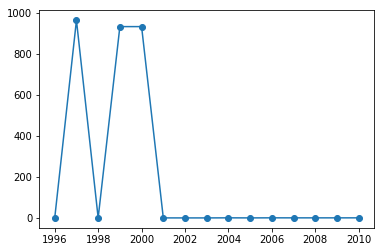

In [15]:
#3.3. Tracciare il grafico di dispersione dei caratteri Anno e Totale.Iscritti. 
#Siccome in questo caso i dati sono ordinati per anno crescente, rigenerare il grafico di dispersione collegando 
#ciascun punto al successivo tramite una linea spezzata, al fine di evidenziare una tendenza.
x = bb["Anno"]
y = bb["Totale Iscritti"]
colors = np.random.rand(100)
plt.scatter(x,y)
plt.plot(x,y) #collegare i puntini!!!!
plt.show()

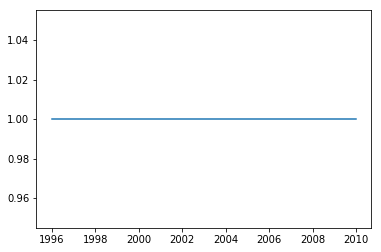

non cresce negli anni


In [16]:
#3.4. Commentare, anche avvalendosi di strumenti formali, la seguente affermazione: 
#"si può notare che nel corso degli anni c’è stato un incremento, seppur modesto, del numero di iscrizioni al 
#servizio Bibliobus".
ecdf = sm.distributions.ECDF(bb["Totale Iscritti"])
x = bb["Anno"]
y = ecdf(x)
plt.step(x,y)
plt.show()
print("non cresce negli anni")

In [17]:
#3.5 Prendiamo ora in considerazione le biblioteche Affori e Quarto Oggiaro.
#In Figura 1 sono mostrati nella parte alta i grafici del numero totale di nuovi utenti in ciascun anno e nella parte 
#bassa la funzione cumulativa, che indica quindi il totale degli utenti della biblioteca in ciascun anno. 
#I grafici della parte bassa della figura sono in ordine giusto? Cioè ciascuno corrisponde al grafico delle frequenze 
#soprastante? Giustificate la risposta.
print("Si sono nella giusta corrispondenza. Nel grafico di quarto oggiaro possiamo notare una forte aumento delle frequenze nell'anno 2002 che si riflette nelle ecdf con un aumento dell'altezza dei gradini")

Si sono nella giusta corrispondenza. Nel grafico di quarto oggiaro possiamo notare una forte aumento delle frequenze nell'anno 2002 che si riflette nelle ecdf con un aumento dell'altezza dei gradini


### Esercizio 4

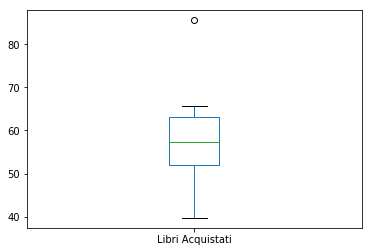

In [18]:
#Esercizio 4.1. Tracciare il boxplot oppure l’istogramma (se uno dei due grafici vi sembra più rappresentativo) del numero di libri acquisiti in un anno da una biblioteca.
sor = dati[dati['Biblioteca'] == 'Biblioteca Centrale Sormani']
sory = sor[['Anno','Libri Acquistati']].groupby('Anno').sum()
sory.plot.box()
plt.show()

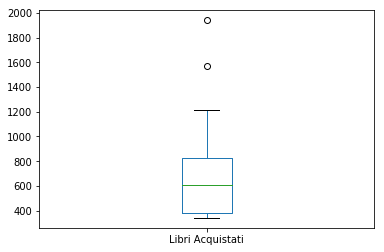

In [19]:
#Esercizio 4.2. I grafici del punto precedente rivelano la presenza di alcuni outlier. 
#Questi valori sono tutti relativi alla Biblioteca Centrale Sormani. 
#Tracciare il boxplot oppure l’istogramma (se uno dei due grafici vi sembra più rappresentativo) del numero di libri acquisiti in un anno da una biblioteca, escludendo però la Biblioteca Centrale Sormani.
no_sor = dati[dati['Biblioteca'] != 'Biblioteca Centrale Sormani']
no_sory = no_sor[['Anno','Libri Acquistati']].groupby('Anno').sum()
no_sory.plot.box()
plt.show()

In [20]:
#Esericizio 4.3. 


In [21]:
#Esercizio 4.3.1. Se si esclude la Biblioteca Centrale Sormani si vede che il numero di libri acquisiti annualmente da una biblioteca ha un andamento "a campana":
# determinare i parametri di tale distribuzione; 

In [22]:
#Esercizio 4.3.2. utilizzare la tecnica del qqplot per controllare se anche il numero di libri acquisiti annualmente dalla sola Biblioteca Centrale Sormani segue una legge normale.

### Esercizio 5
#### 5.1.1 
$$Var(\overline{X}) = \frac{1}{n} Var(X)$$
$$\sqrt(Var(\overline{X})) = \sqrt{\frac{Var(X)}{n}}$$
#### 5.1.2 $$ -\frac{100}{\frac{1}{\sqrt{n}\sigma}} < \frac{\overline{X}-E(X)}{\frac{1}{\sqrt{n}}\sigma} <  \frac{100}{\frac{1}{\sqrt{n}\sigma}}$$
$$P(|Z| < \frac{100}{\frac{1}{\sqrt{n}\sigma}}) = 0.99$$
Poichè so che $\sigma$=90 ottengo:
$$P(|Z| < \frac{10\sqrt{n}}{9}) = 0.99$$
#### 5.1.3 Per il teorema del limite centrale 
$$P(Z < \frac{10\sqrt{n}}{9}) \approx \Phi(\frac{10}{9}\sqrt{n}) - \Phi(-\frac{10}{9}\sqrt{n}) = \Phi(\frac{10}{9}\sqrt{n}) - (1- \Phi(\frac{10}{9}\sqrt{n})) = 2\Phi(\frac{10}{9}\sqrt{n})) -1 $$

#### 5.2.1

#### 5.2.2 
$$n > \frac{Var(X)}{\sigma \epsilon^2} = \frac{90^2}{0.9*100^2} = ? $$